In [1]:
!pip install --upgrade pixiedust

Requirement already up-to-date: pixiedust in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.1.17)


In [2]:
import pandas as pd

import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [3]:
!wget https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/data/HuntingBayou.csv
    

--2019-10-29 17:45:44--  https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/data/HuntingBayou.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43511 (42K) [text/plain]
Saving to: ‘HuntingBayou.csv’

100%[======================================>] 43,511      --.-K/s   in 0.002s  

2019-10-29 17:45:44 (17.1 MB/s) - ‘HuntingBayou.csv’ saved [43511/43511]



In [4]:
! head -n 35 HuntingBayou.csv

# ---------------------------------- WARNING ----------------------------------------
# Some of the data that you have obtained from this U.S. Geological Survey database
# may not have received Director's approval. Any such data values are qualified
# as provisional and are subject to revision. Provisional data are released on the
# condition that neither the USGS nor the United States Government may be held liable
# for any damages resulting from its use.
#
# Additional info: https://help.waterdata.usgs.gov/policies/provisional-data-statement
#
# File-format description:  https://help.waterdata.usgs.gov/faq/about-tab-delimited-output
# Automated-retrieval info: https://help.waterdata.usgs.gov/faq/automated-retrievals
#
# Contact:   gs-w_support_nwisweb@usgs.gov
# retrieved: 2019-02-27 16:27:28 EST       (nadww01)
#
# Data for the following 1 site(s) are contained in this file
#    USGS 08075770 Hunting Bayou at IH 610, Houston, TX
# ----------------------------------------------------

In [5]:
df = pd.read_csv('HuntingBayou.csv',sep='\t',skiprows=(0-28),header=(29))

In [6]:
df.head()

,agency_cd,site_no,datetime,tz_cd,140488_00060,140488_00060_cd,140489_00065,140489_00065_cd
0,5s,15s,20d,6s,14n,10s,14n,10s
1,USGS,08075770,2017-08-23 00:00,CDT,7.92,A,17.23,A
2,USGS,08075770,2017-08-23 00:15,CDT,7.92,A,17.23,A
3,USGS,08075770,2017-08-23 00:30,CDT,7.92,A,17.23,A
4,USGS,08075770,2017-08-23 00:45,CDT,7.92,A,17.23,A


In [7]:
df = df.drop(0)

In [8]:
df.rename(columns={'140488_00060': 'Discharge(cfs)', '140489_00065': 'GuageHeight(feet)'}, inplace=True)

In [9]:
df.rename(columns={'site_no': 'site_name'}, inplace=True)
df['site_name'].replace("08075770", "HuntingBayou.csv", inplace=True)

In [10]:
df.drop(['agency_cd', '140488_00060_cd', '140489_00065_cd', 'tz_cd'], axis=1, inplace=True)

In [11]:
df['GuageHeight(feet)'] = df['GuageHeight(feet)'].convert_objects(convert_numeric=True)
df['Discharge(cfs)'] = df['Discharge(cfs)'].convert_objects(convert_numeric=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [12]:
df['datetime'] = df['datetime'].map(lambda x: x.lstrip('2017-'))

In [13]:
df['latitude']='29.808611'
df['longitude']='-95.313056'

In [14]:
df.head()


,site_name,datetime,Discharge(cfs),GuageHeight(feet),latitude,longitude
1,HuntingBayou.csv,8-23 00:00,7.92,17.23,29.808611,-95.313056
2,HuntingBayou.csv,8-23 00:15,7.92,17.23,29.808611,-95.313056
3,HuntingBayou.csv,8-23 00:30,7.92,17.23,29.808611,-95.313056
4,HuntingBayou.csv,8-23 00:45,7.92,17.23,29.808611,-95.313056
5,HuntingBayou.csv,8-23 01:00,7.92,17.23,29.808611,-95.313056


In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

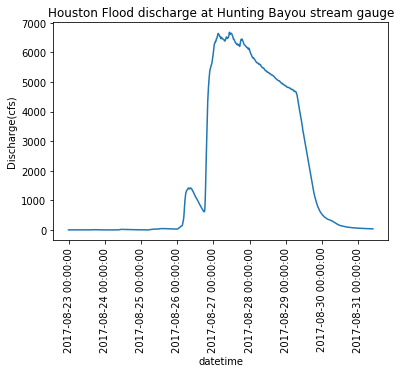

In [16]:
# setup line graph
plt.plot(df['datetime'],df['Discharge(cfs)'])
plt.title('Houston Flood discharge at Hunting Bayou stream gauge')
plt.ylabel('Discharge(cfs)')
plt.xlabel('datetime')
ax = plt.gca()
df.set_index('datetime')

# Only label every 20th value
ticks_to_use = df.index[::100]
# label ticks per day
dr = pd.date_range('2017-08-23', periods=9, freq='D')

## Now set the ticks and labels
ax.set_xticks(ticks_to_use)
ax.set_xticklabels(dr)
plt.xticks(rotation='vertical')

plt.show()

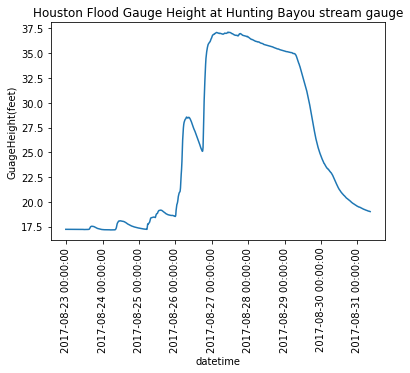

In [17]:
# setup line graph
plt.plot(df['datetime'],df['GuageHeight(feet)'])
plt.title('Houston Flood Gauge Height at Hunting Bayou stream gauge')
plt.ylabel('GuageHeight(feet)')
plt.xlabel('datetime')
ax = plt.gca()
df.set_index('datetime')

# Only label every 20th value
ticks_to_use = df.index[::100]
# label ticks per day
dr = pd.date_range('2017-08-23', periods=9, freq='D')

## Now set the ticks and labels
ax.set_xticks(ticks_to_use)
ax.set_xticklabels(dr)
plt.xticks(rotation='vertical')

plt.show()

In [18]:
hunting = df
display(hunting)

In [19]:
hunting = df
display(hunting)

In [20]:
!wget https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/data/maxFlood.csv

--2019-10-29 17:49:06--  https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/data/maxFlood.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 291 [text/plain]
Saving to: ‘maxFlood.csv’

100%[======================================>] 291         --.-K/s   in 0s      

2019-10-29 17:49:07 (11.2 MB/s) - ‘maxFlood.csv’ saved [291/291]



In [21]:
maxFlood = pd.read_csv('maxFlood.csv')

In [22]:
maxFlood

,site_name,datetime,Discharge,Gage_Height,latitude,longitude
0,HuntingBayou,8-27 7:30,6640,37.10,29.808611,-95.313056
1,WhiteoakBayou,8-27 5:30,30700,39.54,29.775000,-95.396944
2,BraysBayou,8-27 23:00,33200,45.08,29.696944,-95.411944
3,WhiteoakBayouMainSt,8-27 14:00,1,38.09,29.766389,-95.358333


In [23]:
display(maxFlood)

In [24]:
!wget https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/data/streamGauges.geojson
    

--2019-10-29 17:54:35--  https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/data/streamGauges.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 944176 (922K) [text/plain]
Saving to: ‘streamGauges.geojson’

100%[======================================>] 944,176     --.-K/s   in 0.04s   

2019-10-29 17:54:35 (22.0 MB/s) - ‘streamGauges.geojson’ saved [944176/944176]



In [25]:
from pixiedust.display.app import *
from pixiedust.apps.mapboxBase import MapboxBase

@PixieApp
class HoustonDashboard(MapboxBase):
    def setup(self):
        self.mapJSONOptions = {
      "colorrampname": "Green to Purple",
      "coloropacity": "100",
      "handlerId": "mapView",
      "kind": "simple",
      "mapboxtoken": "pk.eyJ1IjoibXVrZXoiLCJhIjoiY2syNmUxdTh0MGFpOTNmczlybjFhMXBiMyJ9.pfSZ1gi9_EWeMvEx_-G2Xw",
      "keyFields": "latitude,longitude",
      "valueFields": "Gage_Height(feet),Discharge(cfs),date,time"
    }
        

        self.setLayers([
        {
            "name": "Houston Flooded Streets",
            "url": "https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/data/houston.geojson",
            "type": "LineString"
        },
        {
            "name": "Random fictional homes",
            "url": "https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/data/HoustonFloodedZips250.geojson",
            "circle-color": "rgb(0, 255, 0)"
        }
        ])
    def formatOptions(self,options):
        return ';'.join(["{}={}".format(key,value) for (key, value) in iteritems(options)])
    
    @route()
    def mainScreen(self):
        return """
<div class="well">
    <center><span style="font-size:x-large">Analyzing Houston Flood data with PixieDust</span></center>
</div>
<div class="row">
    <div class="form-group col-sm-2" style="padding-right:10px;">
        <div><strong>Layers</strong></div>
        {% for layer in this.layers %}
        <div class="rendererOpt checkbox checkbox-primary">
            <input type="checkbox" pd_refresh="map{{prefix}}" pd_script="self.toggleLayer({{loop.index0}})">
            <label>{{layer["name"]}}</label>
        </div>
        {%endfor%}
    </div>
    <div class="form-group col-sm-10">
        <div id="map{{prefix}}" pd_entity pd_options="{{this.formatOptions(this.mapJSONOptions)}}"/>
    </div>
</div>
"""

HoustonDashboard().run(maxFlood,runInDialog="false")

In [26]:
!pip install folium==0.5.0

     |████████████████████████████████| 81kB 17.5MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium


In [27]:
import folium

# define the world map centered around Canada with a higher zoom level
houston_map = folium.Map(location=[29.808611, -95.313056], zoom_start=8)

# display world map
houston_map

In [28]:
# instantiate a feature group for the incidents in the dataframe
gauges = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(maxFlood.latitude, maxFlood.longitude):
    gauges.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
houston_map.add_child(gauges)

In [29]:
# instantiate a feature group for the stream gauges in the dataframe
gauges = folium.map.FeatureGroup()

# loop through the stream gauges and add each to the gauges feature group
for lat, lng, in zip(maxFlood.latitude, maxFlood.longitude):
    gauges.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add site_name pop-up text to each marker on the map
latitudes = list(maxFlood.latitude)
longitudes = list( maxFlood.longitude)
label = list(maxFlood.site_name)

for lat, lng, label in zip(latitudes, longitudes, label):
    folium.Marker([lat, lng], popup=label).add_to(houston_map)    
    
# add gauges to map
houston_map.add_child(gauges)

# add clickable lat and long info
houston_map.add_child(folium.LatLngPopup())

In [30]:
houston_map.add_child(folium.ClickForMarker(popup='My House'))
